# Week 2. Day 3. Exercises from Chapter 5 of FSStDS. 
## Fundamentals of Social Data Science. MT 2022

Within your study pod discuss the following questions. Please submit an individual assignment by 12:30pm Monday, October 24, 2022 on Canvas. 

# Exercise - build your own Reddit crawler

Reddit is a vast resource of community forums as a viable site for a large amount of research in computational social science. Some of that research involves interacting with the Reddit platform. We will not be doing much of that. However, we can still do a vast amount simply by requesting data from the site and analysing it. 

In this exercise you will have to be clear about how you want to optimise something for specificity or generality. More general might work at different time periods, different subreddits or users. More specific might be focusing or accounting for features within a specific subreddit or community. 

We cannot do everything in this crawler so it is better to pick a specific task and then test that under a number of circumstances than it is to make it too general.  

Rubric: 
    
This exercise will be in three parts. 
- **Part 1.** The setup [10pts]. The example below gives a sense of this. You should be able to articulate a very simple research question, an operationalisation of the concepts, a detail of the unit of analysis, the variables of interest, and challenges. This should not be overly involved - see the example below is rather terse (though I suspect you could do better). Including literature helps but is not necessary. 
- **Part 2.** The code [10pts]. What code will you use? Place the code in the answer below your setup. When run by a TA it does not have to produce the same result that you received, but it should produce a result. The 10 points will remain vague but the TAs will be considering all of the FREE mnenomic (is it functioning, robust, elegant, efficient). Particularly for online data, robustness is really important. 
- **Part 3.** The analysis [5pts]. What analysis will you use? We have not introduced any real statistical concepts so I expect this to be generally comparative at this point. You are welcome to report descriptive data, normalised data, or even a statistical model if you feel comfortable, but it should be very, very simple. 

Think of this like your first 'towardsdatascience' blog post. In that sense, we are not looking for academic tier work (just yet) but work that simply explains the concepts and setup, shows a way to collect some limited data, and then shows a simple analysis. 

The more general you can make the code the better (to a point). But in that sense, be careful with hard coding variable names or options. Try to avoid spaghetti code if possible. 

# Part 1. Setup

__answer below here__

**Research Question**: What is the distribution of average sentiments across subreddits on reddit?

**Concept Operationalization**: The sentiment of posts can be measured simply using NLTK's out-of-the-box sentiment scorer. 

**Unit of Analysis**: Since many reddit posts don't have body texts, we'll just use title text since every post has a title.

**Variables of Interest**: Title text, sentiment score, average sentiment score for a subreddit

**Technical Challenge**: The generation of random subreddits is being done via [this website](https://www.coolgenerator.com/random-subreddits-generator). However, it's unclear if it's a truly random set of subreddits. Experimentation implies that it may not be sampling the whole of reddit since within samples of 100, there are often repeated subreddits.

# Part 2. Code 

In [1]:
import requests as req
import pandas as pd
import numpy as np
import time as tm
import re
import json
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.downloader import download
download("vader_lexicon")

from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/matthewbone/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


**The RedditCrawler is using Selenium which requires an install of chromedriver. I don't expect that this will be installed in everyone's computer so I've included the previously scraped data as a csv in the zip file. This can be run from the block two below this one to display the analysis.**

In [5]:
class RedditCrawler:

    def __init__(self):

        chrome_options = Options()
        chrome_options.add_argument("--headless")
        chrome_path = r'/usr/local/bin/chromedriver'

        self.driver = webdriver.Chrome(service=Service(
            '/usr/local/bin/chromedriver'), options=chrome_options)
        self.subreddits = []
        self.posts_df = None

        self.driver.get(
            "https://www.coolgenerator.com/random-subreddits-generator")

    def get_subreddit_links(self):
        links = self.driver.find_elements(By.XPATH, "//a")
        reddit_links = []
        for link in links:
            try:
                if 'reddit.com/r/' in link.get_attribute('href'):
                    reddit_links.append(link.get_attribute('href'))
            except:
                continue
        return reddit_links

    def click_generate_btn(self):
        btns = [btn if btn.text == 'Generate' else None for btn in self.driver.find_elements(
            By.CLASS_NAME, 'btn')]
        gen_btn = list(filter(None, btns))[0]
        gen_btn.click()

    def quit(self):
        self.driver.quit()

    def sample_subreddits(self, N):
        rounds = int(N / 8) + 1
        links = []
        for i in range(rounds):
            links = links + self.get_subreddit_links()
            self.click_generate_btn()
        self.subreddits = links[0:N]
        return links[0:N]

    def get_reddit_posts(self):

        posts = []
        sia = SentimentIntensityAnalyzer()

        for sub in self.subreddits:

            response = req.get(re.sub('www', 'api', sub)).text

            try:
                entries = json.loads(req.get(re.sub('www', 'api', sub), headers={
                                     'User-agent': 'cheekybot'}).text)['data']['children']
            except:
                print('failed')
                continue

            for entry in entries[5:25]:
                temp = {}
                temp['subreddit'] = entry['data']['subreddit']
                temp['title'] = entry['data']['title']

                sentiment = sia.polarity_scores(
                    re.sub('[^a-zA-Z ]', '', entry['data']['title']).lower())
                temp['sentiment'] = sentiment['compound']

                posts.append(temp)

        self.posts_df = pd.DataFrame(posts)


generator = RedditCrawler()
generator.sample_subreddits(1000)
generator.get_reddit_posts()
generator.quit()


failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed


In [ ]:
generator.posts_df.to_csv('reddit.csv', index=False)
loaded_df = pd.read_csv('reddit.csv')

In [ ]:
print(f"{len(loaded_df)} posts were collected over {len(loaded_df['subreddit'].unique())} subreddits")
loaded_df.sample(10)

4950 posts were collected over 228 subreddits


,subreddit,title,sentiment
1030,ksi,credit :- unknown,0.3818
1941,quityourbullshit,"Self-published author asks for opinions, then ...",0.0000
195,Defenders,Defenders S1 every song,0.0772
3903,techsupportgore,ummm,0.0000
4320,Warhammer,"I can't be the only one that's thinking this, ...",0.0000
1966,HipHopImages,"Jadakiss, Ma$e and Cam'ron",0.0000
4207,Multicopter,The Avata might be the most exciting drone of ...,0.5413
115,Frugal,Freezing tomato juice,-0.1027
889,nosleep,I've been keeping a journal. The lullaby is co...,0.0000
3578,randomactsofkindness,"Spider-Man at it again, giving out hugs and gi...",0.6808


In [ ]:
sent_df = loaded_df.groupby('subreddit').agg({'sentiment': ['mean', 'min', 'max']})
sent_df.sample(10)

sentiment                
                      mean     min     max
subreddit                                 
ihadastroke       0.065880 -0.5719  0.8074
unpopularopinion  0.108425 -0.8227  0.8750
Bioshock          0.111205 -0.5574  0.5106
worldnews        -0.134275 -0.5994  0.4939
AnimalReddits     0.122715 -0.9001  0.7430
sweden           -0.010115 -0.2023  0.0000
CanadaPolitics   -0.187345 -0.7906  0.6369
pokemongo         0.039220 -0.8945  0.7766
UpliftingNews    -0.040530 -0.5574  0.6486
MachinePorn       0.019990 -0.3818  0.4019

Mean: 0.05, Std dev: 0.34


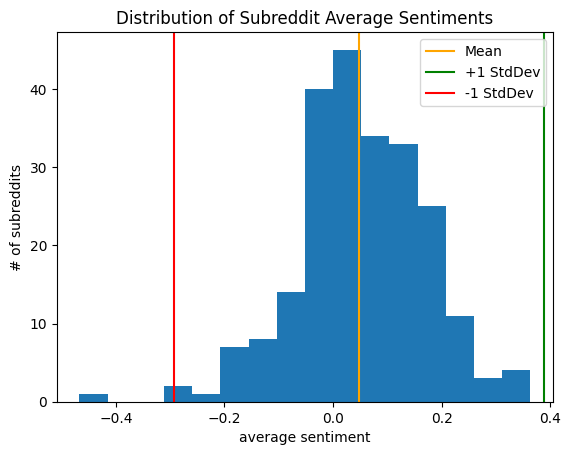

In [ ]:
mean = loaded_df['sentiment'].mean()
std = loaded_df['sentiment'].std()
print(f"Mean: {mean:.2f}, Std dev: {std:.2f}")
plt.hist(sent_df[('sentiment', 'mean')], bins=16)
plt.axvline(x=mean, color="orange", label="Mean")
plt.axvline(x=mean + std, color="green", label="+1 StdDev")
plt.axvline(x=mean - std, color="red", label="-1 StdDev")
plt.ylabel('# of subreddits')
plt.xlabel('average sentiment')
plt.title('Distribution of Subreddit Average Sentiments')
plt.legend()

In [ ]:
saddest_subs = sent_df.sort_values([('sentiment', 'mean')]).head(5)
happiest_subs = sent_df.sort_values([('sentiment', 'mean')]).tail(5)

print('Subreddits with the lowest sentiment:')
display(saddest_subs)
print('Subreddits with the highest sentiment:')
display(happiest_subs)

Subreddits with the lowest sentiment:


sentiment                
                         mean     min     max
subreddit                                    
UnresolvedMysteries -0.467230 -0.9306  0.0387
raisedbynarcissists -0.290175 -0.8591  0.5096
KarmaCourt          -0.273365 -0.8316  0.6486
medical             -0.212555 -0.8718  0.0000
Health              -0.206030 -0.7506  0.6705

Subreddits with the highest sentiment:


sentiment                
                          mean     min     max
subreddit                                     
Random_Acts_Of_Pizza  0.306175 -0.5849  0.8360
TheMonkeysPaw         0.317560 -0.9217  0.7845
randomactsofkindness  0.349375 -0.8555  0.9766
C25K                  0.349990 -0.1779  0.9134
happycowgifs          0.363590  0.0000  0.7650

# Part 3.

The mean of the distribution is .05, with a slight leftward skew. The sentiment score provided by NLTK is on a scale of -1 to 1 where the lower the score, the more negative the sentiment. The subreddit with the lowest average sentiment is "UnresolvedMysteries" which makes sense since it seems to be composed mostly of unsolved but violent cases. It is a bit of an oulier here, lying well below one standard deviation below the mean. "Happycowgifs" has the highest average sentiment, the reason seems to be self-evident.

# Example crawler 

To inspire you, here are a couple examples of tasks that would be at the right scale:

## Talking with flair. 

On a variety of communities on reddit, you can (and sometimes are required to) have flair which is a little tag next to the person. On the /r/ukpolitics subreddit for example flair is used to denote political affiliation. 

__Research question:__ 
Do people who use flair speak differently or behave differently than those who do not? 

__Operationalisation of concepts:__
There are many potential ways to encode 'speak differently or behave differently' that we might operationalise. For this, I will look at a set of the hot 100 posts a subreddit as taking a reasonable sample. 

__Unit of analysis:__ 
For each of these posts I will look at the comments. I will not look at all the comments due to the complexity of navigating the comment tree. Rather, when you query a reddit post it comes down with a truncated set of comments. I will be using these. 

__Variables of interest:__ 
For each of the comments on the stories I will store the following:
- username
- comment text for feature extraction
- coment score
- user flair

Then I will wrangle the data so that we group by flair and take the average of the comment score for each flair. This will be reported in a table showing:

~~~
flair | n_users | n_comments | avg_comment_score
~~~

I will probably truncate that table as I expect a long-tail distribution. 

__Technical challenges__

We know from class how to download a set of posts, but not how to download the post itself and the comments within it, however, it seems that `<postname>.json` will still work so that should be automatable. I plan to use this post.json and not crawl for all of the comments, deleted comments etc... 